## Manufacturing Juggernaut, a data science project analyzing China's transition to advanced manufacturing, and its impact on U.S.-China trade relations. 05/15/2019


### For background information, please check out: https://github.com/ssbfcboris1/Manufacturing_Juggernaut

### The following are a few data-visualization graphs from my initial research:

In [3]:
import numpy as ny
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import random
%matplotlib inline

In [42]:
wb_4_mfg = pd.read_csv('D:\\Boris\\Manufacturing Juggernaut\\World Bank, total Manufacturing, value added, Big 4 countries.csv')

In [44]:
wb_4_mfg.fillna(0, inplace=True)
wb_4_mfg = wb_4_mfg.transpose()

In [45]:
wb_4_mfg.head()

,0,1,2,3
Country Code,CHN,DEU,JPN,USA
2000,0,4.04199e+11,1.10254e+12,1.54368e+12
2001,0,3.99993e+11,9.14666e+11,1.46647e+12
2002,0,4.15358e+11,8.59389e+11,1.46026e+12
2003,0,5.02691e+11,9.38495e+11,1.51778e+12


In [46]:
wb_4_mfg.columns = ['CHN','DEU','JPN','USA']
wb_4_mfg.drop(index='Country Code', inplace=True)
wb_4_mfg.head()

,CHN,DEU,JPN,USA
2000,0,4.04199e+11,1.10254e+12,1.54368e+12
2001,0,3.99993e+11,9.14666e+11,1.46647e+12
2002,0,4.15358e+11,8.59389e+11,1.46026e+12
2003,0,5.02691e+11,9.38495e+11,1.51778e+12
2004,6.25224e+11,5.71733e+11,1.02719e+12,1.6057e+12


## 1. The World Bank 2000-2012 data on value-added manufacturing output by four leading industrialized countries: Germany, Japan, China, the U.S.

https://data.worldbank.org/indicator/NV.IND.MANF.CD?end=2012&locations=CN-DE-JP-US&name_desc=true&start=2000

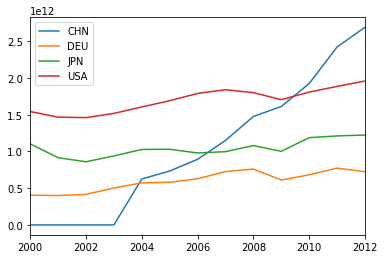

In [47]:
wb_4_mfg.plot.line()

### Notes: In 2004, China's total manufacturing output surpassed that of Germany; before 2007, it edged out Japan as the second-largest manufacturing country.  Not long after the 2008 financial crisis, China overtook the U.S. as the world's largest producer of physical goods. 

In [48]:
wb_4_mfg.corr()

plt.matshow(wb_4_mfg.corr())
plt.xticks(range(len(wb_4_mfg.columns)), wb_4_mfg.columns)
plt.yticks(range(len(wb_4_mfg.columns)), wb_4_mfg.columns)
plt.colorbar()
plt.show()

ZeroDivisionError: division by zero

In [49]:
wb_4_hi_tech = pd.read_csv('D:\\Boris\\Manufacturing Juggernaut\\World Bank, high-tech percentage of mfg export, 2000-2012.csv')

In [50]:
wb_4_hi_tech = wb_4_hi_tech.transpose()

wb_4_hi_tech.columns = ['CHN','DEU','JPN','USA']

wb_4_hi_tech.drop(index='Country Code', inplace=True)


## 2. The World Bank 2000-2012 data on high-technology % of manufactured exports: Germany, Japan, China, the U.S.
https://data.worldbank.org/indicator/NV.IND.MANF.CD?end=2012&locations=CN-DE-JP-US&name_desc=true&start=2000

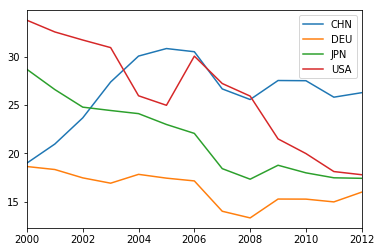

In [51]:
wb_4_hi_tech.plot.line()

### Notes: The about chart demonstrates China's attempt at upgrading its manufacturing capability from low-cost, labor intensive contract work to the high value-added, high-tech end of the specturm.

In [52]:
oecd_svce = pd.read_csv('D:\\Boris\\Manufacturing Juggernaut\\OECD services exports.csv')

In [ ]:
oecd_svce.head()

In [53]:
big4 = ['DEU','JPN','USA','CHN']
oecd_4_svce = oecd_svce.loc[oecd_svce['LOCATION'].isin(big4)]
oecd_4_svce.head()

,LOCATION,TIME,Value
0,DEU,2000,81471.13
1,DEU,2001,82936.97
2,DEU,2002,98556.63
3,DEU,2003,119723.70
4,DEU,2004,151633.40


In [54]:
oecd_4_svce_P = oecd_4_svce.pivot_table(index='TIME', columns='LOCATION').reset_index()

oecd_4_svce_P.drop(['TIME'], axis=1, inplace=True)

oecd_4_svce_P.corr()

C:\Users\thinkpad\Anaconda3\lib\site-packages\pandas\core\generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


Value                              
LOCATION             CHN       DEU       JPN       USA
      LOCATION                                        
Value CHN       1.000000  0.974247  0.965834  0.995240
      DEU       0.974247  1.000000  0.990395  0.964650
      JPN       0.965834  0.990395  1.000000  0.953624
      USA       0.995240  0.964650  0.953624  1.000000

## 3. OECD 2000-2012 data on the annual export of services by the U.S., Germany, Japan, and China 

https://data.oecd.org/ict/ict-goods-exports.htm#indicator-chart  (search key words: trade in services)

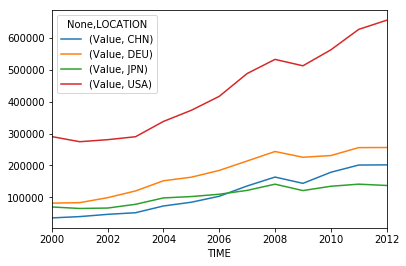

In [55]:
oecd_4_svce.pivot_table(index='TIME', columns='LOCATION').plot.line()

### Notes: Data scientists in an increasingly "information economy," as well as Wall Street bankers and lawyers, Hollywood movie producers may find the above chart more reassuring.  The U.S. remains by far the world's leader in exporting services.  In 2012, its services export was more than Germany, Japan, and China's combined.  

In [32]:
wb_4_exp_gdp = pd.read_csv('D:\\Boris\\Manufacturing Juggernaut\\World Bank, Big 4, exports of goods and services as percentage of GDP, 2000-2012.csv')

In [33]:
wb_4_exp_gdp

,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,CHN,20.893445,20.312146,22.644746,26.980757,31.061338,33.829858,36.035026,35.388179,32.519573,24.456651,26.267414,26.494323,25.408196
1,DEU,30.829538,31.870679,32.574040,32.591483,35.448424,37.740454,41.190348,43.009912,43.459875,37.802201,42.250374,44.818173,45.982540
2,JPN,10.624485,10.229099,11.018221,11.639293,12.972032,14.012441,15.872902,17.493317,17.424038,12.520914,15.036757,14.924996,14.544753
3,USA,10.664643,9.666071,9.132386,9.037519,9.625368,9.996398,10.654792,11.497907,12.514398,11.011656,12.315059,13.530538,13.528919


In [34]:
wb_4_exp_gdp_t = wb_4_exp_gdp.iloc[:,1:].T
wb_4_exp_gdp_t.columns = ['CHN','DEU','JPN','USA']
wb_4_exp_gdp_t

,CHN,DEU,JPN,USA
2000,20.893445,30.829538,10.624485,10.664643
2001,20.312146,31.870679,10.229099,9.666071
2002,22.644746,32.574040,11.018221,9.132386
2003,26.980757,32.591483,11.639293,9.037519
2004,31.061338,35.448424,12.972032,9.625368
2005,33.829858,37.740454,14.012441,9.996398
2006,36.035026,41.190348,15.872902,10.654792
2007,35.388179,43.009912,17.493317,11.497907
2008,32.519573,43.459875,17.424038,12.514398
2009,24.456651,37.802201,12.520914,11.011656


## 4. The World Bank 2000-2012 data on the combined export of goods and services as percentage of GDP: Germany, Japan, China, the U.S.

https://data.worldbank.org/indicator/NE.EXP.GNFS.ZS?end=2012&name_desc=true&start=2000

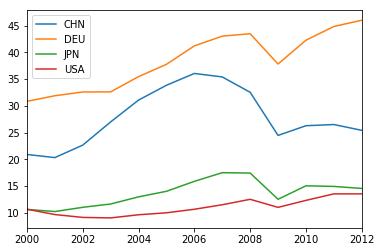

In [35]:
wb_4_exp_gdp_t.plot.line()

### Notes: This chart may serve as a reality check to trade hawks in the Trump Administration.  Its hardball negotiation tactics, and unilateral raising of tariff on Chinese import, may not put enough dent on the Chinese GDP growth to force the desired concession.  Combined export of goods and services contributed to around 23% of China's GDP in 2012 (the latest figure, according to press reports, is 19%), indicating that the Chinese economy has grown to a mature stage, with a huge domestic market, rising size of the middle class, and enormous aggregate consumer spending that can theoretically generate enough demand for further GDP growth.  

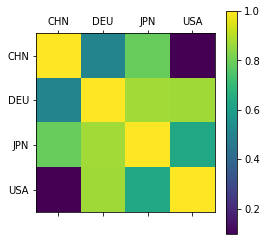

In [30]:
wb_4_exp_gdp_t.corr()

plt.matshow(wb_4_exp_gdp_t.corr())
plt.xticks(range(len(wb_4_exp_gdp_t.columns)), wb_4_exp_gdp_t.columns)
plt.yticks(range(len(wb_4_exp_gdp_t.columns)), wb_4_exp_gdp_t.columns)
plt.colorbar()
plt.show()

### Notes: The above chart is based on the same World Bank "export as percentage of GDP" figures for each of the 4 countries under study.  The Chinese and the U.S. numbers are the least correlated.  